In [10]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from model import ModelClass

In [11]:
# loading the dataset
data = load_diabetes()
X, y = data.data, data.target

print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

# Split into training (80%) and testing (20%)
# Suffling of data is done during the train_test_split process itself
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape: X_train : ", X_train.shape,"and y_train : ", y_train.shape)
print("Testing set shape: X_test : ", X_test.shape,"and y_test : ", y_test.shape)

num_features = X.shape[1]

Shape of X :  (442, 10)
Shape of y :  (442,)
Training set shape: X_train :  (353, 10) and y_train :  (353,)
Testing set shape: X_test :  (89, 10) and y_test :  (89,)


In [12]:
# Question 1:: use the built in lasso with regularization alpha = 0.2 and report the MSE error

# Initialize Lasso with alpha = 0.2, random_state = 42
lassoModel = Lasso(alpha=0.2, random_state=42, max_iter=50000, tol=1e-4)

# Fit on training data
lassoModel.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lassoModel.predict(X_test)

# Compute MSE
mseForLasso = mean_squared_error(y_test, y_pred_lasso)

print("Test MSE (Lasso, α=0.2):", mseForLasso)

Test MSE (Lasso, α=0.2): 2820.3666683620127


In [13]:
# pre-requisites
# before moving ahead, lets concat the weights and bias into single augmented weights 
# this will help us work easier
model = ModelClass()
X_train, X_test =  model.augmentData(X_train, X_test)

Shape of trainX after augmenting a new column of 1: (353, 11)
Shape of testX after augmenting a new column of 1: (89, 11)


Shape of W: (11,)
num_examples in training set :  353
num examples in validation set :  89
Loss after 1 epochs: 3017.387682
Loss after 500 epochs: 1842.904490
Loss after 1000 epochs: 1845.128062
Loss after 1500 epochs: 1841.437362
Loss after 2000 epochs: 1846.439046
Loss after 2500 epochs: 1841.260812
Loss after 3000 epochs: 1842.169689
Loss after 3500 epochs: 1853.157814
Loss after 4000 epochs: 1841.815282
Loss after 4500 epochs: 1841.393813
Loss after 5000 epochs: 1843.246299
Loss after 5500 epochs: 1842.686460
Loss after 6000 epochs: 1841.438282
Loss after 6500 epochs: 1842.941810
Loss after 7000 epochs: 1841.171467
Loss after 7500 epochs: 1845.339900
Loss after 8000 epochs: 1847.039136
Loss after 8500 epochs: 1841.582468
Loss after 9000 epochs: 1842.022735
Loss after 9500 epochs: 1841.948734
Loss after 10000 epochs: 1854.699210
Loss after 10500 epochs: 1851.554412
Loss after 11000 epochs: 1842.562427
Loss after 11500 epochs: 1843.756789
Loss after 12000 epochs: 1845.798693
Loss aft

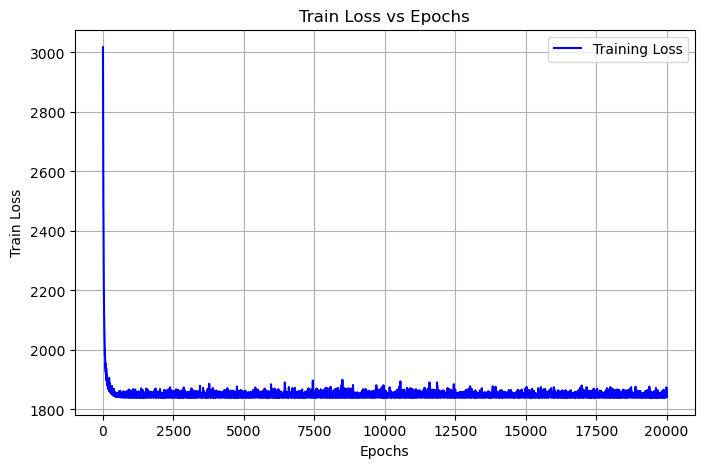

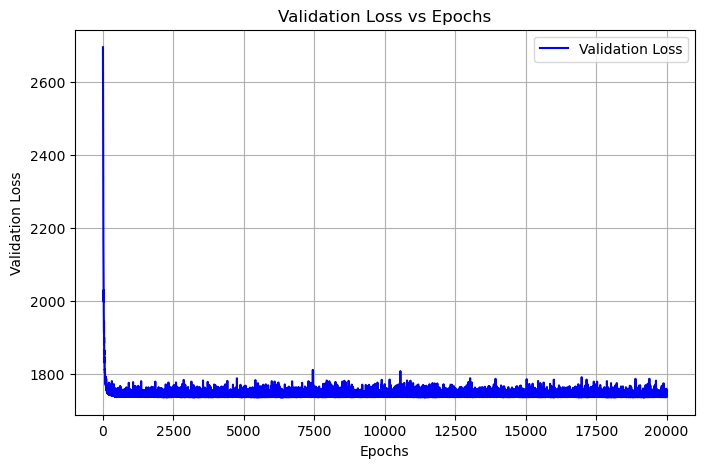

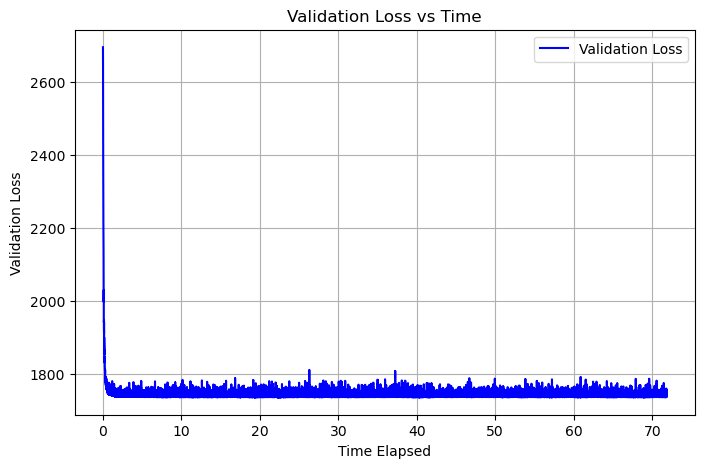

Time taken to converge: 72.37526845932007
Final parameters we got from SGD are :  [ 1.58177686e+02  2.42490213e-01 -8.13721347e+01  5.46836276e+02
  2.65158880e+02 -2.64512779e-01 -3.15529314e-01 -1.97913904e+02
  3.07561295e-01  3.96553506e+02  6.59481243e-01]
Test MSE (SGD, α=0.2): 2840.069769984915


In [17]:
# Question 3
# batch size = 1, step length fixed = 0.01, number of iterations = 50000, convergence_threshold = 1e-4
W = model.initializeParameters(num_features+1)

# SGD
# Idea : here we will find loss for each training example and then update the parameters
paramsOfSGD = model.runSGD(X_train, y_train, W, X_test, y_test, window = 10, enableDynamicStepSize = False)
print("Final parameters we got from SGD are : ", paramsOfSGD)

y_pred_sgd = X_test @ paramsOfSGD

# Compute MSE
mseForSGD = mean_squared_error(y_test, y_pred_sgd)

print("Test MSE (SGD, α=0.2):", mseForSGD)

Shape of W: (11,)
num_examples in training set :  353
num examples in validation set :  89
Loss after 1 epochs: 3015.649715
Loss after 500 epochs: 1842.700930
Loss after 1000 epochs: 1841.364187
Loss after 1500 epochs: 1843.820490
Loss after 2000 epochs: 1842.547088
Loss after 2500 epochs: 1841.602502
Loss after 3000 epochs: 1850.576442
Loss after 3500 epochs: 1847.885913
Loss after 4000 epochs: 1849.869664
Loss after 4500 epochs: 1842.006377
Loss after 5000 epochs: 1841.155833
Loss after 5500 epochs: 1841.618550
Loss after 6000 epochs: 1842.459273
Loss after 6500 epochs: 1841.607584
Loss after 7000 epochs: 1842.441093
Loss after 7500 epochs: 1856.186437
Loss after 8000 epochs: 1841.788582
Loss after 8500 epochs: 1844.439116
Loss after 9000 epochs: 1856.876441
Loss after 9500 epochs: 1844.631598
Loss after 10000 epochs: 1841.431537
Loss after 10500 epochs: 1843.056422
Loss after 11000 epochs: 1841.907834
Loss after 11500 epochs: 1841.317731
Loss after 12000 epochs: 1841.322652
Loss aft

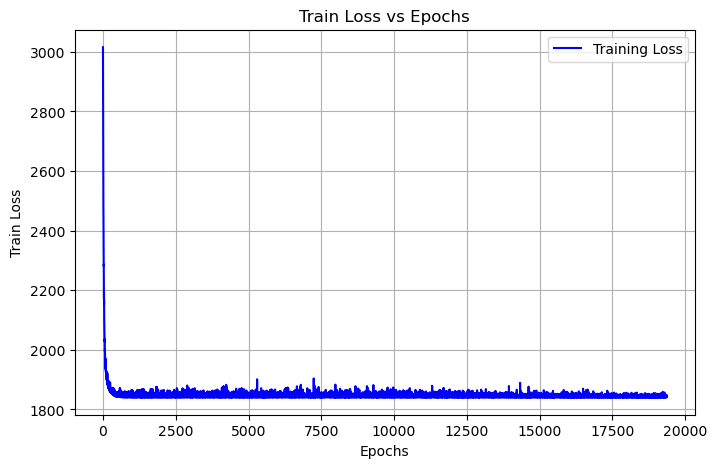

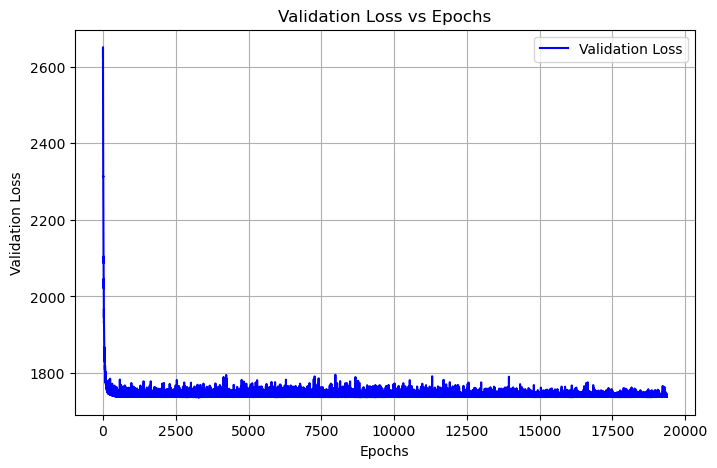

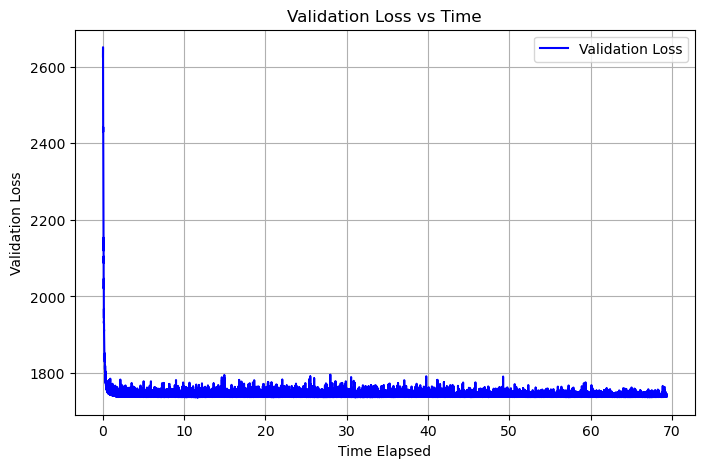

Time taken to converge: 69.98031282424927
Final parameters we got from SGD are :  [ 1.49710945e+02  9.99898968e-02 -8.14784481e+01  5.46954602e+02
  2.65123885e+02 -2.16273619e-01 -1.46404184e-01 -1.97878407e+02
  5.74261778e-02  3.96008545e+02  3.48435514e-01]
Test MSE (SGD, α=0.2): 2831.5389692806284


In [22]:
# Question 3
# batch size = 1, variable step length fixed, number of iterations = 50000, convergence_threshold = 1e-4
W = model.initializeParameters(num_features+1)

# SGD
# Idea : here we will find loss for each training example and then update the parameters
paramsOfSGD = model.runSGD(X_train, y_train, W, X_test, y_test, window = 10)
print("Final parameters we got from SGD are : ", paramsOfSGD)

y_pred_sgd = X_test @ paramsOfSGD

# Compute MSE
mseForSGD = mean_squared_error(y_test, y_pred_sgd)

print("Test MSE (SGD, α=0.2):", mseForSGD)

Shape of W: (11,)
num_examples in training set :  353
num examples in validation set :  89
Loss after 1 epochs: 3115.121896
Loss after 500 epochs: 1842.350269
Converged at epoch 896 (loss stabilized (Δ < 0.0001))


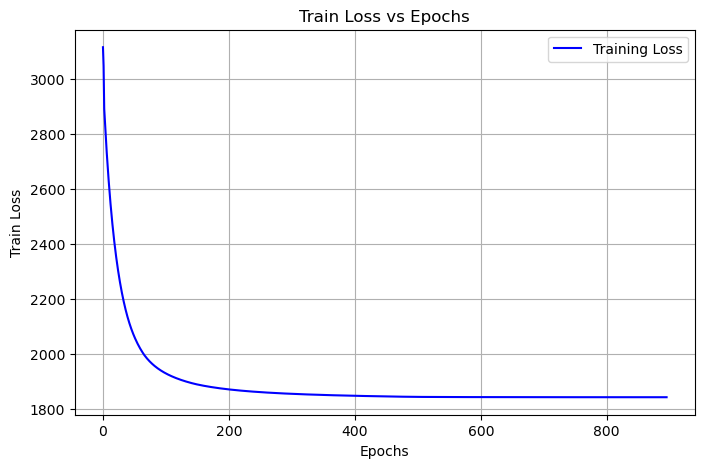

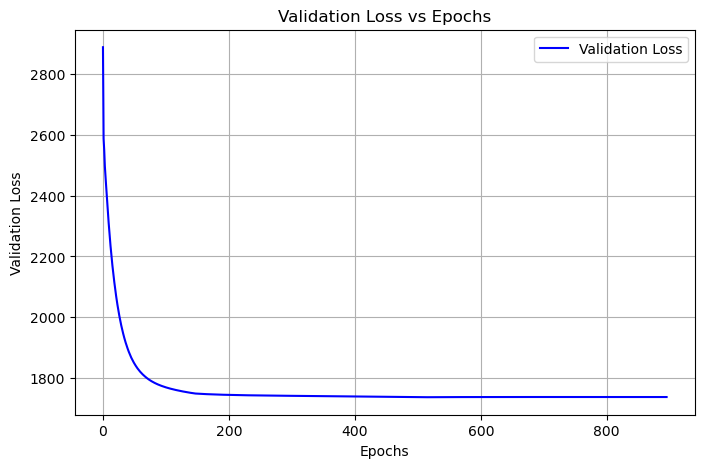

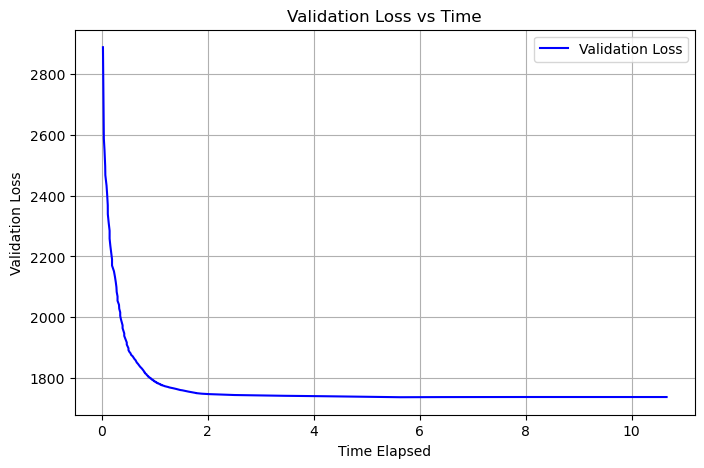

Time taken to converge: 11.095372438430786
Final parameters we got from SAGA are :  [ 1.51811254e+02  4.06217414e-03 -8.20958162e+01  5.44852927e+02
  2.66202071e+02 -2.33482853e-04  3.96184108e-03 -1.98861782e+02
 -1.01839955e-05  3.93285087e+02  2.95943441e+00]
Test MSE (SAGA, α=0.2): 2820.935207900625


In [20]:
# SAGA
W = model.initializeParameters(num_features+1)

# Idea : here we will maintain a vector of curr gradient for each training example and 
# update grad = mean_grad_of_training_exams - old_grad_of_that_example + new_grad_of_that_example
paramsOfSAGA = model.runSGD(X_train, y_train, W, X_test, y_test, SAGA = True)
print("Final parameters we got from SAGA are : ", paramsOfSAGA)

y_pred_saga = X_test @ paramsOfSAGA

# Compute MSE
mseForSAGA = mean_squared_error(y_test, y_pred_saga)

print("Test MSE (SAGA, α=0.2):", mseForSAGA)

Shape of W: (11,)
num_examples in training set :  353
num examples in validation set :  89
Loss after 1 epochs: 3018.796876
Loss after 500 epochs: 1844.643259
Loss after 1000 epochs: 1842.636735
Loss after 1500 epochs: 1844.736998
Loss after 2000 epochs: 1859.296103
Loss after 2500 epochs: 1843.253406
Loss after 3000 epochs: 1843.981897
Loss after 3500 epochs: 1842.171266
Loss after 4000 epochs: 1841.730100
Loss after 4500 epochs: 1844.745515
Loss after 5000 epochs: 1843.555463
Loss after 5500 epochs: 1841.191988
Loss after 6000 epochs: 1853.222439
Loss after 6500 epochs: 1841.690895
Loss after 7000 epochs: 1841.122048
Loss after 7500 epochs: 1842.398423
Loss after 8000 epochs: 1841.180464
Loss after 8500 epochs: 1841.404344
Loss after 9000 epochs: 1843.171588
Converged at epoch 9291 (loss stabilized (Δ < 0.0001))


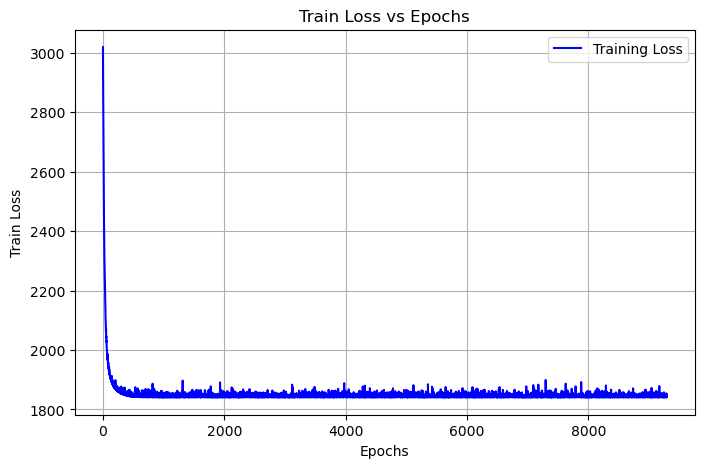

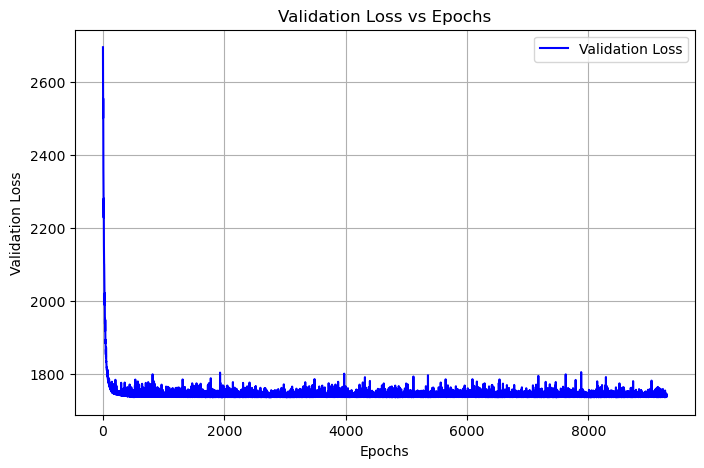

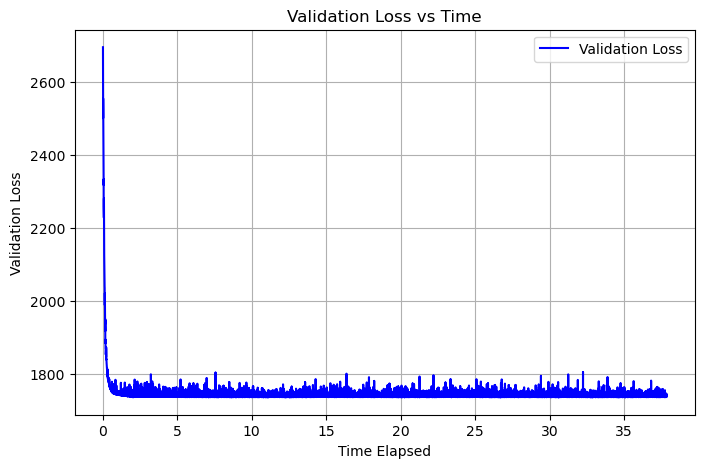

Time taken to converge: 38.36679792404175
Final parameters we got from proxGD are :  [ 1.49309423e+02  1.48184520e-01 -8.16391500e+01  5.47097275e+02
  2.65058168e+02 -5.40879401e-01 -2.37827066e-01 -1.97885841e+02
 -5.89563009e-02  3.96339345e+02  4.11221751e-01]
Test MSE (Prox GD, α=0.2): 2834.5145511017467


In [14]:
# Prox GD
W = model.initializeParameters(num_features+1)

# Idea :  find the regular grad of the current batch(here for the current example like we did for SGD) -> v_(t+1)
# Get the proximal w_(t+1) = prox_{step_size*non_diff_part}(v_(t+1)) 
# And w_(t+1) = S_{step_size*alpha}(v_(t+1))
paramsOfProxGD = model.runSGD(X_train, y_train, W, X_test, y_test, proxGD = True, window = 10)
print("Final parameters we got from proxGD are : ", paramsOfProxGD)

y_pred_proxGD = X_test @ paramsOfProxGD

# Compute MSE
mseForProxGD = mean_squared_error(y_test, y_pred_proxGD)

print("Test MSE (Prox GD, α=0.2):", mseForProxGD)

Shape of W: (11,)
num_examples in training set :  353
num examples in validation set :  89
Loss after 1 epochs: 3060.006119
Loss after 500 epochs: 1852.687324
Loss after 1000 epochs: 1845.503383
Loss after 1500 epochs: 1841.861802
Loss after 2000 epochs: 1842.749482
Loss after 2500 epochs: 1842.194463
Loss after 3000 epochs: 1843.137370
Loss after 3500 epochs: 1848.070637
Loss after 4000 epochs: 1844.121145
Loss after 4500 epochs: 1841.156223
Loss after 5000 epochs: 1841.418911
Loss after 5500 epochs: 1849.980393
Loss after 6000 epochs: 1842.210940
Loss after 6500 epochs: 1842.975974
Loss after 7000 epochs: 1848.127835
Loss after 7500 epochs: 1843.107405
Loss after 8000 epochs: 1841.587614
Loss after 8500 epochs: 1850.739862
Loss after 9000 epochs: 1843.298716
Loss after 9500 epochs: 1842.935798
Loss after 10000 epochs: 1842.014252
Loss after 10500 epochs: 1841.266915
Loss after 11000 epochs: 1843.581959
Loss after 11500 epochs: 1853.079203
Loss after 12000 epochs: 1845.436423
Loss aft

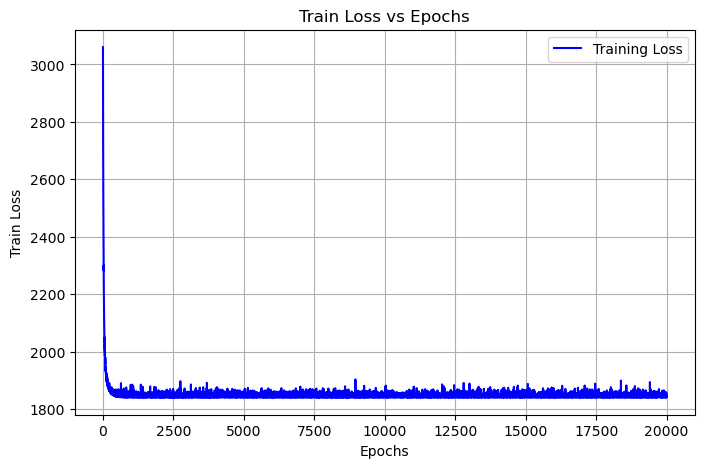

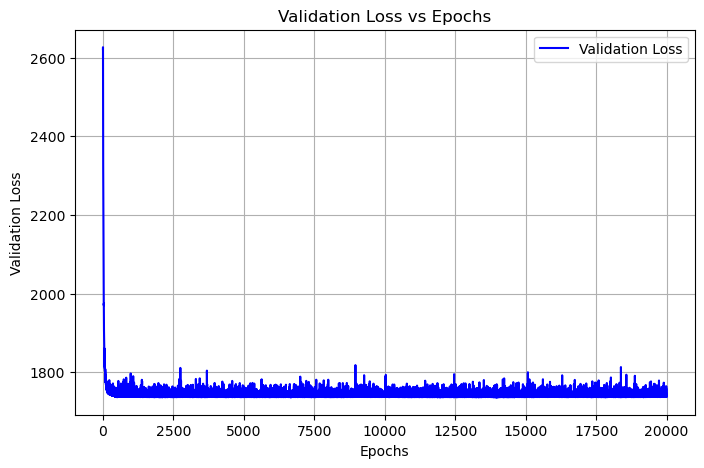

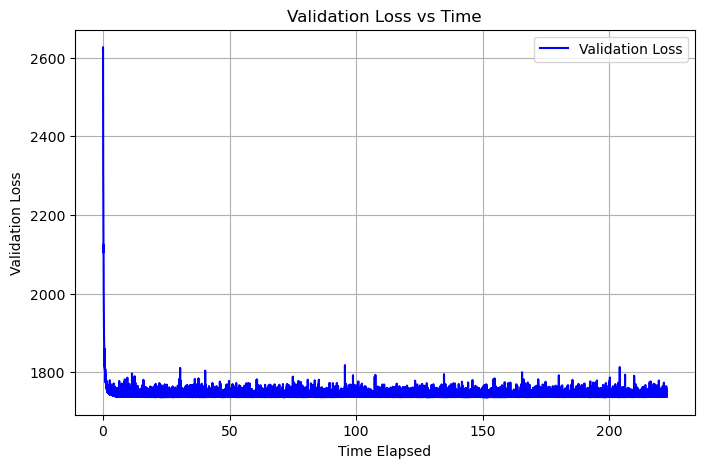

Time taken to converge: 223.11412596702576
Final parameters we got from SGD with backtracking line search are :  [ 1.50922148e+02 -5.76498879e-03 -8.13493712e+01  5.46969842e+02
  2.65079496e+02 -3.74069801e-01 -5.42735417e-01 -1.97942741e+02
 -2.26707234e-01  3.96415125e+02  3.55722461e-01]
Test MSE (SGD, α=0.2, stepSize = backtracking line search): 2823.8456621570213


In [10]:
# Question 4
# Implement backtracking line search as a function on SGD and check if the performance has improved
W = model.initializeParameters(num_features+1)

# SGD with backtracking line search
# Idea : here we will find loss for each training example with backtracking line search and then update the parameters
paramsOfSGD_withBLS = model.runSGD(X_train, y_train, W, X_test, y_test, backTrackLS = True)
print("Final parameters we got from SGD with backtracking line search are : ", paramsOfSGD_withBLS)

y_pred_sgd_bls = X_test @ paramsOfSGD_withBLS

# Compute MSE
mseForSGD_bls = mean_squared_error(y_test, y_pred_sgd_bls)

print("Test MSE (SGD, α=0.2, stepSize = backtracking line search):", mseForSGD_bls)